# Dealing with inbalanced Dataset



# Loading data

In [145]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True

In [146]:
# file_all_features = up.open("Data/all_feature.root")
# all_feature = file_all_features['all_feature'].arrays(library = 'np')

In [147]:
all_feature = pd.read_csv("all_features.csv")

In [148]:
all_feature = all_feature.rename(columns={'R_delayed': 'R_del', 'R_prompt': 'R_pro'})

## Checking the dataset size

(array([1000081., 1468385.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

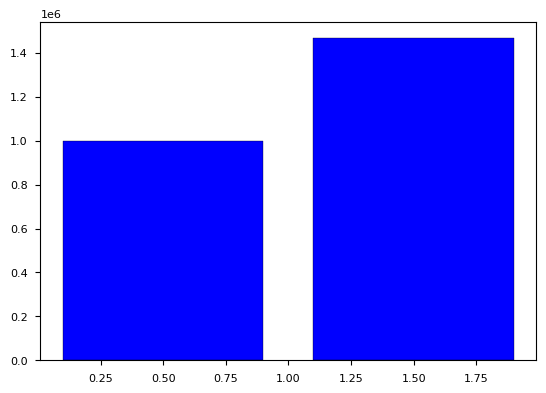

In [149]:
#plot a hist that counts the IBD and BKG
plt.hist(all_feature['Label'], bins = 2, range = (0,2), histtype = 'bar', rwidth = 0.8, color = 'b', label = 'BKG')




# Balancing the dataset

In [150]:
print("BKG: ", all_feature["delta_time"][all_feature['Label']==0].shape[0])
print("IBD: ", all_feature["delta_time"][all_feature['Label']==1].shape[0]) 

BKG:  1000081
IBD:  1468385


Sotto per mostrare che nel dataset BKG ci sono anche IBD non correlati

In [151]:
print(all_feature['Source'][all_feature["Label"]==0].unique())

[0. 1.]


In [152]:
for key in all_feature.keys():
    print(key)
print(all_feature.keys())

E_pro
delta_radius
Label
E_del
R_del
delta_time
R_pro
Source
Index(['E_pro', 'delta_radius', 'Label', 'E_del', 'R_del', 'delta_time',
       'R_pro', 'Source'],
      dtype='object')


In [153]:
# Elimina gli elementi desiderati dal dataset
num_IBD = all_feature["delta_time"][all_feature['Label']==1].shape[0]
num_BKG = all_feature["delta_time"][all_feature['Label']==0].shape[0]

del_BKG = 0
del_IBD = 0

if num_IBD > num_BKG:
    del_IBD = num_IBD - num_BKG
    to_del_ibd = all_feature.shape[0] - del_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[:to_del_ibd]

elif num_IBD < num_BKG:
    del_BKG = num_BKG - num_IBD
    order = np.argsort(all_feature["Label"])
    all_feature = all_feature.iloc[order].dropna()
    all_feature = all_feature.iloc[del_BKG:]

print("BKG:", all_feature["Label"][all_feature['Label']==0].shape[0]) 
print("IBD:",  all_feature["Label"][all_feature['Label']==1].shape[0])

BKG: 1000081
IBD: 1000081


# Plots

In [154]:
print(np.logical_and(all_feature["E_pro"] > 100 , True).sum())
print(np.logical_and(all_feature["E_del"] > 100 , True).sum())

64
68


In [155]:
all_feature.describe()

,E_pro,delta_radius,Label,E_del,R_del,delta_time,R_pro,Source
count,2.000162e+06,2.000162e+06,2000162.0,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06,2.000162e+06
mean,2.142118e+00,1.059980e+04,0.5,1.534151e+00,1.424177e+04,3.807990e+05,1.424987e+04,5.033117e-01
std,2.157978e+00,1.147984e+04,0.5,1.647265e+00,3.496881e+03,3.145566e+05,3.486147e+03,4.999892e-01
min,0.000000e+00,6.084932e-01,0.0,0.000000e+00,0.000000e+00,6.400000e+02,3.947012e-06,0.000000e+00
25%,5.691091e-01,3.316806e+02,0.0,5.678132e-01,1.220154e+04,1.106400e+05,1.220738e+04,0.000000e+00
50%,1.796610e+00,2.045694e+03,0.5,2.131900e+00,1.531965e+04,2.887090e+05,1.532872e+04,1.000000e+00
75%,3.291638e+00,2.113910e+04,1.0,2.219660e+00,1.739900e+04,6.109250e+05,1.739900e+04,1.000000e+00
max,3.913881e+02,3.479771e+04,1.0,3.913881e+02,1.740007e+04,1.099999e+06,1.740007e+04,1.000000e+00


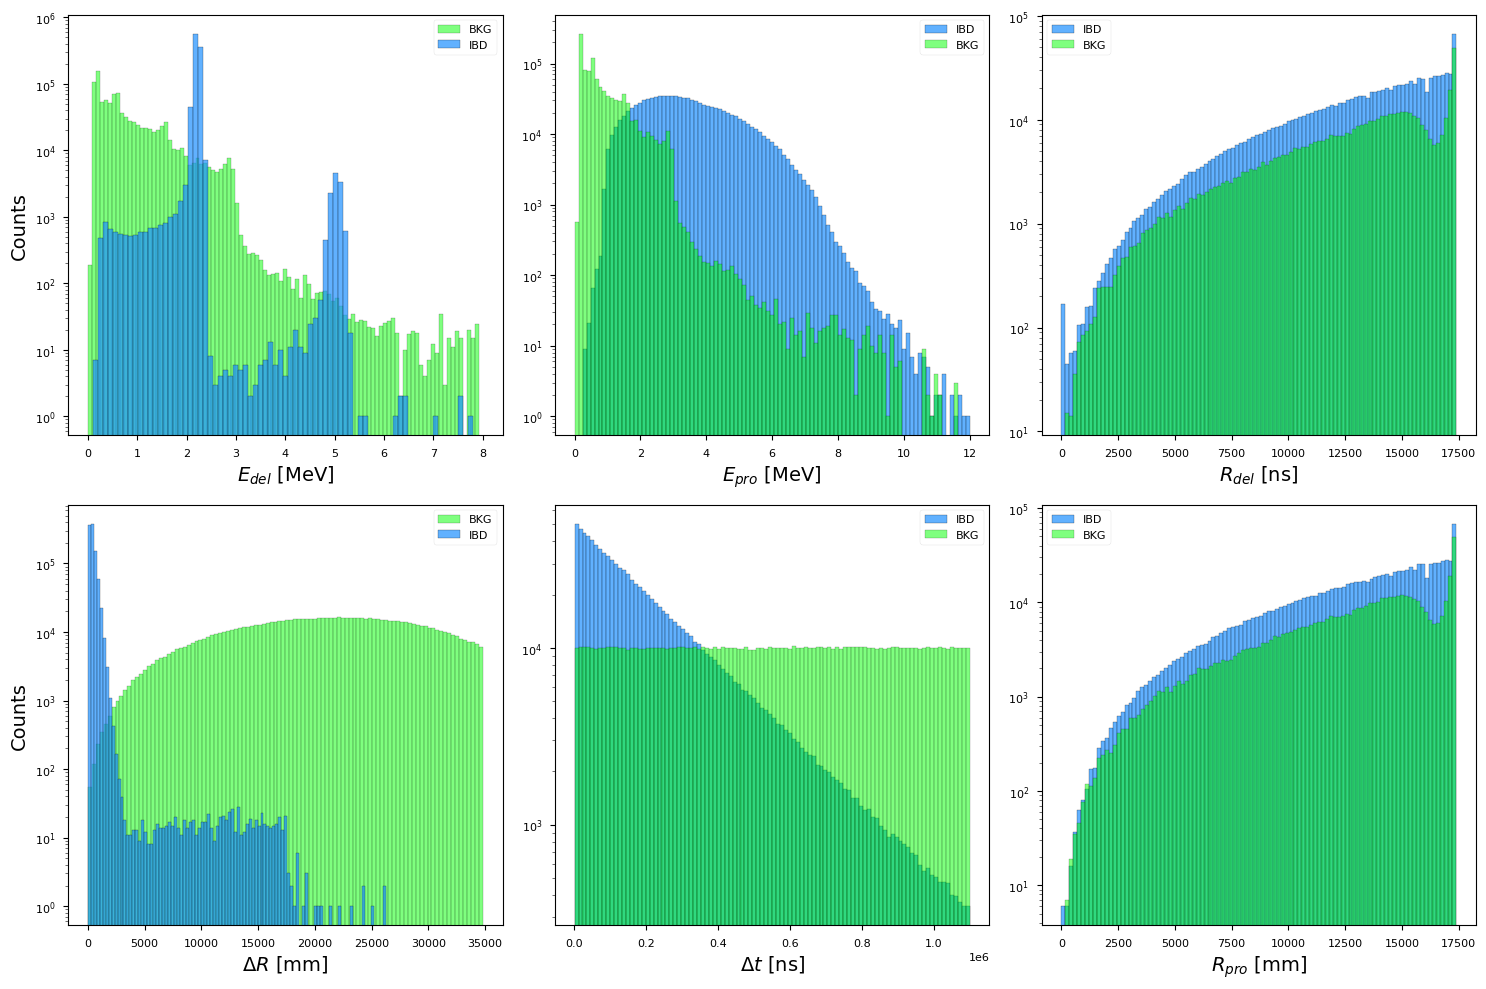

In [156]:
features = ['E_del',"E_pro","R_del","delta_radius","delta_time","R_pro"]
# Definisci le dimensioni della griglia dei subplot
num_rows = 2  # Numero di righe
num_cols = 3  # Numero di colonne

# Crea una figura e una griglia di subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Itera attraverso tutte le features
for idx, feature in enumerate(features):
    # Calcola gli indici della riga e della colonna corrente
    row = idx // num_cols
    col = idx % num_cols

    # Seleziona l'asse corrispondente alla riga e alla colonna corrente
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    if feature == "E_del":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,8,100), color='lime',alpha = 0.5, label='BKG', log = 'True')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,8,80), color='dodgerblue',alpha = 0.7, label='IBD', log = 'True')
        ax.set_xlabel(r'$E_{del}$ [MeV]', fontsize=14)
        ax.set_ylabel(r'Counts', fontsize=14)
        ax.legend(loc='upper right')
    
    elif feature == "E_pro":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],np.linspace(0,12,100), color='dodgerblue',alpha = 0.7, label='IBD', log = 'True')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,12,100), color='lime',alpha = 0.5, label='BKG', log = 'True')
        ax.set_xlabel(r'$E_{pro}$ [MeV]', fontsize=14)
        ax.legend(loc='upper right')


    elif feature == "R_pro":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=100, color='dodgerblue',alpha = 0.7, label='IBD', log = 'True')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,17389,100), color='lime',alpha = 0.5, label='BKG', log = 'True')
        ax.set_xlabel(r'$R_{pro}$ [mm]', fontsize=14)
        ax.legend(loc='upper left')

    elif feature == "R_del":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=100, color='dodgerblue',alpha = 0.7, label='IBD', log = 'True')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],np.linspace(0,17389,100), color='lime',alpha = 0.5, label='BKG', log = 'True')
        ax.set_xlabel(r'$R_{del}$ [ns]', fontsize=14)
        ax.legend(loc='upper left')

    elif feature == "delta_radius":
        ax.hist(all_feature[feature][all_feature['Label'] == 0],bins=100, color='lime',alpha = 0.5, label='BKG', log = 'True')
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=100, color='dodgerblue',alpha = 0.7, label='IBD', log = 'True')
        ax.set_xlabel(r'$\Delta R}$ [mm]', fontsize=14)
        ax.set_ylabel(r'Counts', fontsize=14)
        ax.legend(loc='upper right')

    elif feature == "delta_time":
        ax.hist(all_feature[feature][all_feature['Label'] == 1],bins=100, color='dodgerblue',alpha = 0.7, label='IBD', log = 'True')
        ax.hist(all_feature[feature][all_feature['Label'] == 0],bins=100, color='lime',alpha = 0.5, label='BKG', log = 'True')
        ax.set_xlabel(r'$\Delta t}$ [ns]', fontsize=14)
        ax.legend(loc='upper right')
    
    

plt.tight_layout()
plt.savefig('../../../../Latex/Images/hist_features.png')
plt.show()

# ML Classification Algorithms

In [157]:
print(all_feature['delta_time'].shape)
print(all_feature['delta_time'].shape)
print(all_feature['E_del'].shape)
print(all_feature['E_pro'].shape)
print(all_feature['R_del'].shape)
print(all_feature['R_pro'].shape)
print(all_feature['delta_radius'].shape)

(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)
(2000162,)


## Creating train and test datasets

In [158]:
from sklearn.model_selection import train_test_split


columns_to_exclude = ['Label', 'Source']


X = all_feature.drop(columns_to_exclude, axis=1)
Y = all_feature['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.1)

## XGBClassifier

In [159]:
from sklearn.metrics import roc_auc_score
import time
import xgboost as xgb

In [160]:
from sklearn.metrics import accuracy_score
import os
import xgboost as xgb

# scale_pos_weight = (len(all_feature['Label'])-all_feature['Label'].sum())/all_feature['Label'].sum()

model_path = "xgboost_new.model"

# Verifica se il file del modello esiste
if os.path.isfile(model_path):
    # Carica il modello da file
    model = xgb.sklearn.XGBClassifier()
    model.load_model(model_path)
    print("Model loaded")
else:
    # Crea e addestra il modello se il file non esiste
    model = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=10000, max_depth=3, learning_rate = 0.05) #, scale_pos_weight = scale_pos_weight)

    eval_set = [(X_train, y_train), (X_validation, y_validation)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False, early_stopping_rounds=10)
    print("Finished training")

    # Salva il modello in file
    model.save_model(model_path)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Calcola l'accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)


Model loaded
Accuracy: 100.00%


In [161]:
accuracy

0.9999825014436309

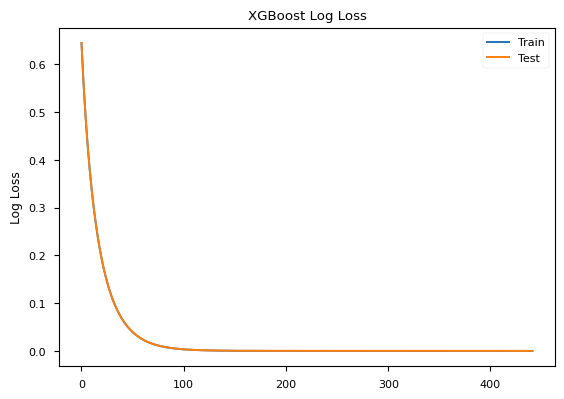

In [162]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# plot log loss

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')

ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()

plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')

plt.show()


### Model Evaluation

In [163]:
import sklearn
print(sklearn.metrics.classification_report(y_test, y_pred))
sklearn.metrics.confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    199815
         1.0       1.00      1.00      1.00    200218

    accuracy                           1.00    400033
   macro avg       1.00      1.00      1.00    400033
weighted avg       1.00      1.00      1.00    400033



array([[199811,      4],
       [     3, 200215]])

In [190]:
TP = np.logical_and(y_test == 1, y_pred == 1)
TN = np.logical_and(y_test == 0, y_pred == 0)
FN = np.logical_and(y_test == 1, y_pred == 0)
FP = np.logical_and(y_test == 0, y_pred == 1) 


import sklearn

print("Efficiency IBD: ", (TP.sum()/(TP.sum()+FN.sum())))
print("Efficiency BKG: ", (TN.sum()/(TN.sum()+FP.sum())))

sklearn.metrics.confusion_matrix(y_test, y_pred)

Efficiency IBD:  0.9999850163321979
Efficiency BKG:  0.9999799814828717


array([[199811,      4],
       [     3, 200215]])

In [165]:
features_names = [key for key in all_feature.keys() if key!= "Label"]
print(features_names)

['E_pro', 'delta_radius', 'E_del', 'R_del', 'delta_time', 'R_pro', 'Source']


### Shap Interpretability

In [166]:
import shap
features_names = X.columns

#Creo un oggetto explainer SHAP
explainer = shap.Explainer(model, X_test[:2000],model_output="probability")

# Calcolo i valori di Shapley per il set di test
shap_values = explainer(X_test[:2000])
 

 97%|=================== | 1942/2000 [00:29<00:00]       

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


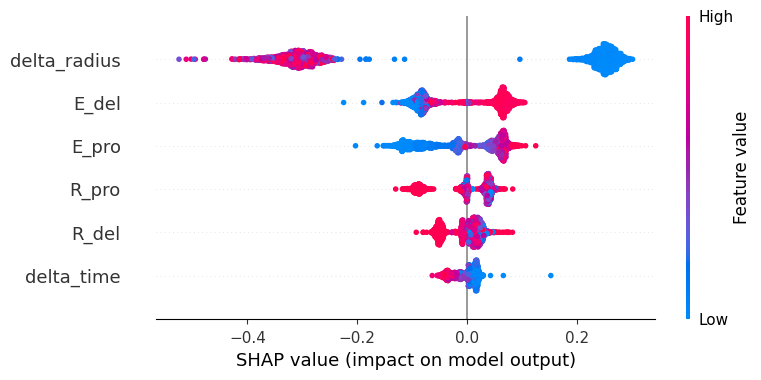

In [167]:
# Plotto il summary plot di SHAP
shap.summary_plot(shap_values, X_test[:2000], feature_names=features_names);

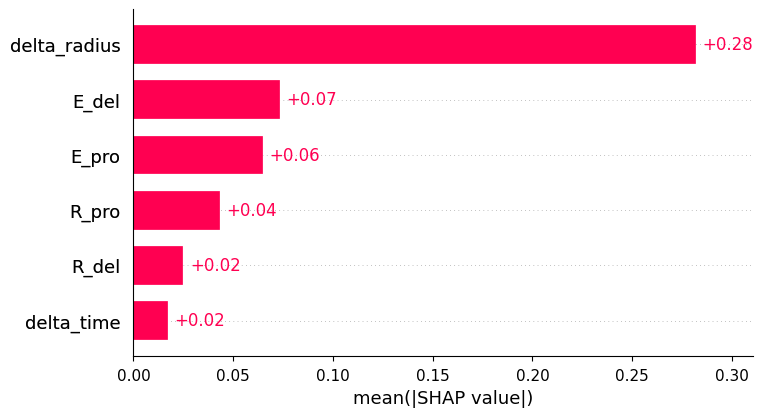

In [168]:
# Importnce plot
shap.plots.bar(shap_values)

In [169]:
shap.initjs()

p = shap.plots.force(shap_values)
# shap.save_html('my_force_plot.html',p )

In [170]:
# #Creo un oggetto explainer SHAP
# explainer_all = shap.Explainer(model, X_test,model_output="probability")
# # Calcolo i valori di Shapley per il set di test
# shap_values_all = explainer(X_test[:200000])
 

In [171]:
# y_test_copy = y_test[:200000].reset_index(drop=True)

In [172]:
# for i in range(len(y_test[:200000])):
#     if y_test_copy[i] != y_pred[i]:
#         print("Mislab", int(y_test_copy[i]), y_pred[i], i) 

In [173]:

# mislabelled_FP = 34691
# print(y_test_copy[mislabelled_FP], y_pred[mislabelled_FP])
# mislabelled_TN = 60787
# print(y_test_copy[mislabelled_TN], y_pred[mislabelled_TN])

# shap.plots.waterfall(shap_values_all[mislabelled_FP])
# shap.plots.waterfall(shap_values_all[mislabelled_TN])


Mislabeld, due grafici per quello

In [174]:
# shap.plots.waterfall(shap_values[1])
# shap.plots.waterfall(shap_values[8])

In [175]:
# #plot the precision-recall curve
# from sklearn.metrics import precision_recall_curve

# from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)

# precision, recall, _ = precision_recall_curve(y_test, predictions)
# disp = PrecisionRecallDisplay(precision=precision, recall=recall)
# disp.plot()
# plt.show()


### Optimizing XGBoost

In [176]:
# from sklearn.model_selection import GridSearchCV 

# #Create values to search over
# cv_params = {'max_depth': [2, 3, 4, 6, 7, 8]}, #Maximum depth of a tree, increasing increase complxity


# ind_params = {'n_estimators': 30000, 'learning_rate': 0.05}
# fit_params = {'early_stopping_rounds': 10, 'eval_metric': 'logloss', 'eval_set':eval_set, 'verbose':0}
# opt_XGBclassifier = GridSearchCV(
#     xgb.XGBClassifier(**ind_params), 
#     cv_params, 
#     scoring = 'accuracy',
#     cv = 10,
#     n_jobs = -1,
#     verbose=0
# )


# opt_XGBclassifier.fit(X_train, y_train, **fit_params)
# opt_XGBclassifier.cv_results_

In [177]:
# #Print scores
# print('The optimal score on training set is {:0.3f}'.format(opt_XGBclassifier.best_score_))

# #Find optimal parameters

# print('The optimal parameters for the classifier are:')
# print(opt_XGBclassifier.best_params_)

# #Fit performance on the test set
# XGBclassifier_final=opt_XGBclassifier.best_estimator_
# y_pred_final=XGBclassifier_final.predict(X_test)
# print("Model Accuray with optimal parameters: {:.2f}%".format(100*XGBclassifier_final.score(X_test, y_test)))
# print("The  AUC score is {:.2f}".format(roc_auc_score(y_test,y_pred_final)))

### Selezione BDT sul dataset di sola radioattività

In [178]:
# all_feature_r = pd.read_csv("all_features.csv")

In [179]:
# X_rad_df = all_feature_r[(all_feature_r["Label"] == 0) & (all_feature_r["Source"] == 0)]
# X_rad = X_rad_df.drop(['Label', 'Source'], axis=1)

# #Now predict y using model XGBoost thath has been trained
# y_rad_pred = model.predict(X_rad)

In [180]:
# print(y_rad_pred.sum(), "su", y_rad_pred.shape[0])

# TP = np.logical_and(X_rad_df['Label'] == 0, y_rad_pred == 0)
# TN = np.logical_and(X_rad_df['Label'] == 1, y_rad_pred == 1)
# FN = np.logical_and(X_rad_df["Label"] == 0, y_rad_pred == 1)
# FP = np.logical_and(X_rad_df["Label"] == 1, y_rad_pred == 0) 

# print(TP.sum())
# print(FN.sum())

# print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
# print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

### Selezione BDT sul dataset di soli veri IBD

In [181]:
# X_true_IBD_df = all_feature_r[(all_feature_r["Label"] == 1) & (all_feature_r["Source"] == 1)]
# X_true_IBD = X_true_IBD_df.drop(['Label', 'Source'], axis=1)

# #Now predict y using model XGBoost thath has been trained
# y_true_IBD_pred = model.predict(X_true_IBD)


In [182]:
# print("Venongono selezionati come IBD ", y_true_IBD_pred.sum(),"Su un tot di", y_true_IBD_pred.shape[0])


# TP = np.logical_and(X_true_IBD_df['Label'] == 1, y_true_IBD_pred == 1)
# TN = np.logical_and(X_true_IBD_df['Label'] == 0, y_true_IBD_pred == 0)
# FN = np.logical_and(X_true_IBD_df["Label"] == 1, y_true_IBD_pred == 0)
# FP = np.logical_and(X_true_IBD_df["Label"] == 0, y_true_IBD_pred == 1) 

# print(TP.sum())
# print(FN.sum())

# print("Efficiency: ", (TP.sum()/(TP.sum()+FN.sum())) * 100)
# print("Purity: ", (TP.sum()/(TP.sum()+FP.sum())) * 100)	

# R vs $\Delta R$

Text(0, 0.5, '$\\Delta$t [ns]')

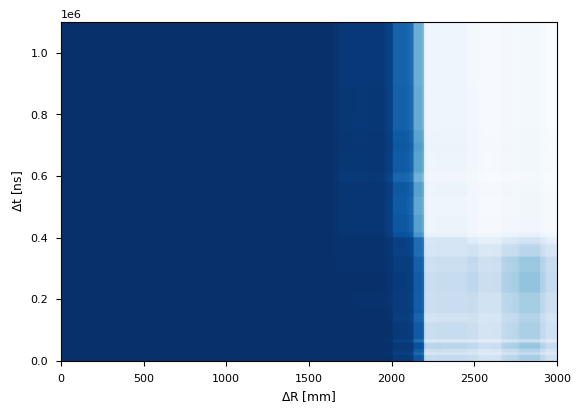

In [183]:
to_plot = pd.DataFrame()

dr_array = np.linspace(0, 3000, 1000)
dt_array = np.linspace(0, 5*220e3, 1000)

dr_mesh, dt_mesh = np.meshgrid(dr_array, dt_array)

elements = len(dr_mesh.flatten())
R = 17600
to_plot['R_pro'] = R*np.ones(elements)
to_plot['R_del'] = R*np.ones(elements)
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = dt_mesh.flatten()
to_plot = to_plot[X.columns]

probs = model.predict_proba(to_plot)[:, 1].reshape(dr_mesh.shape)

plt.imshow(probs, cmap = 'Blues', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), dt_mesh.min(), dt_mesh.max()), aspect = 'auto')

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'$\Delta$t [ns]')

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


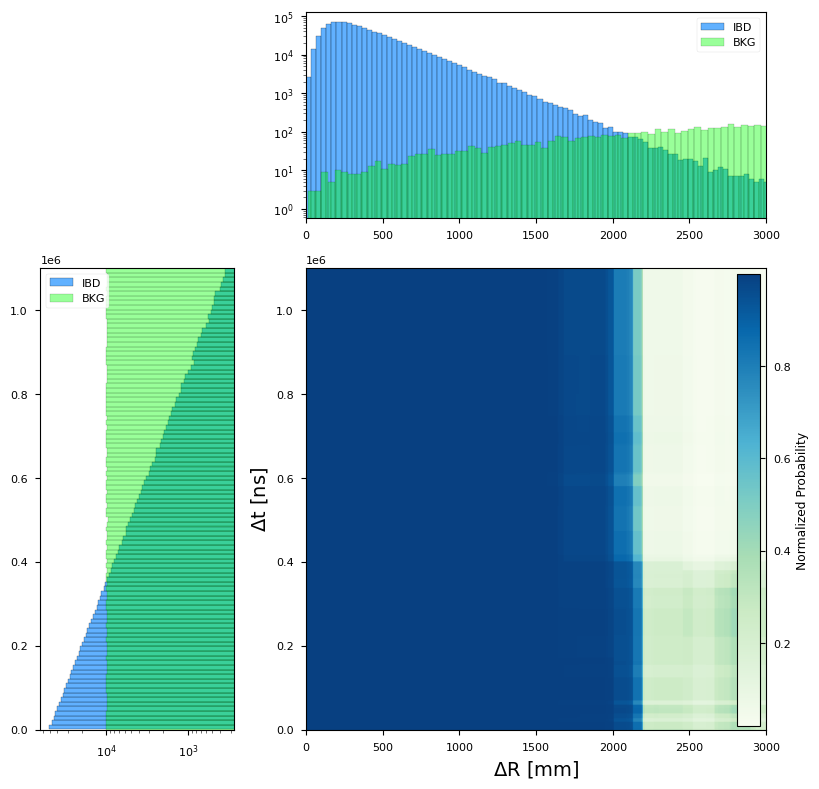

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as nnf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(8, 8))

# Crea un subplot per il grafico principale
ax1 = plt.subplot2grid((3, 3), (1, 1), colspan=2, rowspan=2)

# Aggiungi un'etichetta al grafico imshow
immagine = ax1.imshow(probs, cmap='GnBu', origin='lower', extent=(dr_mesh.min(), dr_mesh.max(), dt_mesh.min(), dt_mesh.max()), aspect='auto')

ax1.set_xlabel(r'$\Delta$R [mm]', fontsize = 14)
ax1.set_ylabel(r'$\Delta$t [ns]', fontsize = 14)

# Crea un set di assi all'interno del grafico principale per la barra dei colori
axins = inset_axes(ax1, width="5%", height="98%", loc='upper right')
cbar = plt.colorbar(immagine, cax=axins, orientation='vertical', label='Normalized Probability')

# Crea un subplot per l'istogramma delta_r
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2, sharex=ax1)

# Calcola e disegna l'istogramma, e rimuovi gli assi duplicati
# Aggiungi un'etichetta all'istogramma
_, bins, _ = ax2.hist(all_feature["delta_radius"][all_feature["Label"] == 1], bins=800, color='dodgerblue', alpha=0.7, label='IBD', log = True)
_, bins, _ = ax2.hist(all_feature["delta_radius"][all_feature["Label"] == 0], bins=800, color='lime', alpha=0.4, label='BKG', log = True)

ax2.legend() # Mostra la legenda
ax2.set_xlim(0, 3000)

# Crea un subplot per l'istogramma delta_t
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, sharey=ax1)

# Calcola e disegna l'istogramma, e rimuovi gli assi duplicati
# Aggiungi un'etichetta all'istogramma
_, bins, _ = ax3.hist(all_feature["delta_time"][all_feature["Label"] == 1], bins=100, orientation='horizontal', color='dodgerblue', alpha=0.7, label='IBD', log = True)
_, bins, _ = ax3.hist(all_feature["delta_time"][all_feature["Label"] == 0], bins=100, orientation='horizontal', color='lime', alpha=0.4, label='BKG', log = True)

ax3.legend() # Mostra la legenda
ax3.invert_xaxis()

plt.tight_layout()

plt.savefig('../../../../Latex/Images/dr_dt_xgboost.png')

plt.show()


The following kwargs were not used by contour: 'aspect'


Text(0, 0.5, 'R_pro[mm]')

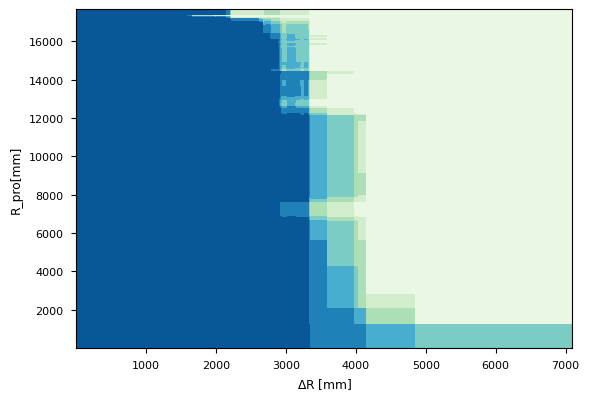

In [185]:
to_plot = pd.DataFrame()

dr_array = np.linspace(0, 7100, 1000)
R_array = np.linspace(0, 17700, 1000)

dr_mesh, R_mesh = np.meshgrid(dr_array, R_array)

elements = len(dr_mesh.flatten())
to_plot['R_pro'] = R_mesh.flatten()
to_plot['R_del'] = to_plot['R_pro']
to_plot['E_pro'] = 1.*np.ones(elements)
to_plot['delta_radius'] = dr_mesh.flatten()
to_plot['E_del'] = 2.2*np.ones(elements)
to_plot['delta_time'] = 220e3
to_plot = to_plot[X.columns]

probs = model.predict_proba(to_plot)[:, 1].reshape(dr_mesh.shape)

plt.contourf(probs, cmap = 'GnBu', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), R_mesh.min(), R_mesh.max()), aspect = 'auto')

plt.xlabel(r'$\Delta$R [mm]')
plt.ylabel(r'R_pro[mm]')

The following kwargs were not used by contour: 'aspect'
This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


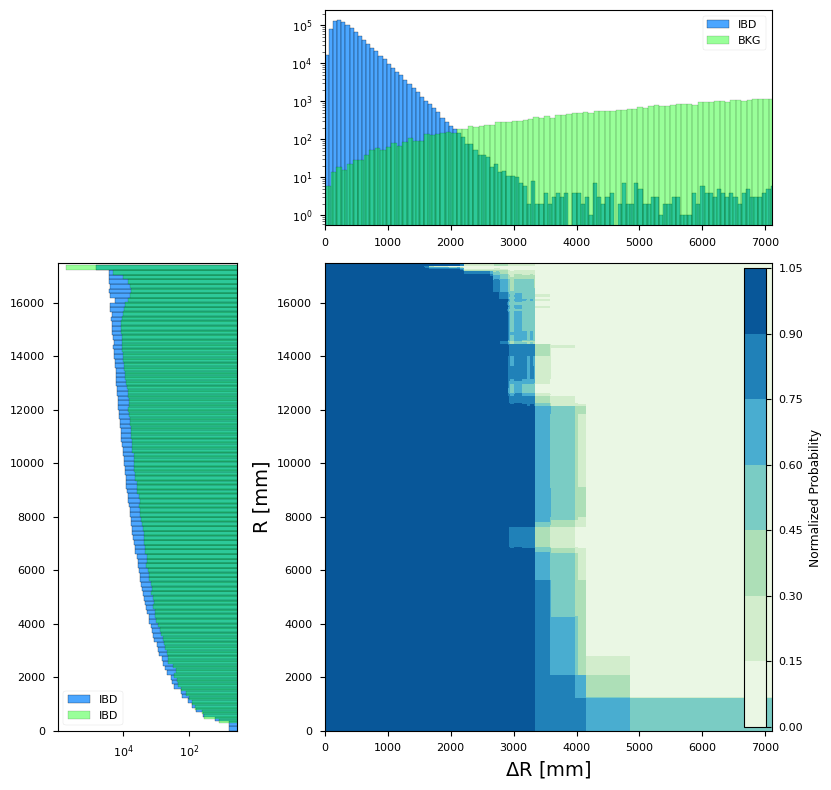

In [186]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


fig = plt.figure(figsize=(8, 8))

# Crea un subplot per il grafico principale
ax1 = plt.subplot2grid((3, 3), (1, 1), colspan=2, rowspan=2)



# immagine = ax1.contourf(probs_normed_n.detach().numpy(), cmap = 'GnBu', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), R_mesh.min(), R_mesh.max()), aspect = 'auto',  levels = 200)
immagine = plt.contourf(probs, cmap = 'GnBu', origin = 'lower', extent = (dr_mesh.min(), dr_mesh.max(), R_mesh.min(), R_mesh.max()), aspect = 'auto')

ax1.set_xlabel(r'$\Delta$R [mm]', fontsize = 14)
ax1.set_ylabel(r'R [mm]', fontsize = 14)

# Crea un set di assi all'interno del grafico principale per la barra dei colori
axins = inset_axes(ax1, width="5%", height="98%", loc='upper right')
cbar = plt.colorbar(immagine, cax=axins, orientation='vertical', label='Normalized Probability')

# Crea un subplot per l'istogramma delta_r
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2, sharex=ax1)

# Calcola e disegna l'istogramma, e rimuovi gli assi duplicati
# Aggiungi un'etichetta all'istogramma
_, bins, _ = ax2.hist(all_feature["delta_radius"][all_feature["Label"] == 1], bins=400, color='dodgerblue', alpha=0.8, label='IBD', log= True)
_, bins, _ = ax2.hist(all_feature["delta_radius"][all_feature["Label"] == 0], bins=400, color='lime', alpha=0.4, label='BKG', log= True)

ax2.legend() # Mostra la legenda
ax2.set_xlim(0, 7100)

# Crea un subplot per l'istogramma delta_t
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, sharey=ax1)
ax3.set_ylim(0, 17500)

# Calcola e disegna l'istogramma, e rimuovi gli assi duplicati
# Aggiungi un'etichetta all'istogramma

_, bins, _ = ax3.hist(all_feature["R_pro"][all_feature["Label"] == 1], bins=100, orientation='horizontal', color='dodgerblue', alpha=0.8, label='IBD', log= True)
_, bins, _ = ax3.hist(all_feature["R_pro"][all_feature["Label"] == 0], bins=100, orientation='horizontal', color='lime', alpha=0.4, label='IBD', log= True)

ax3.legend() # Mostra la legenda
ax3.invert_xaxis()

plt.tight_layout()

plt.savefig('../../../../Latex/Images/dr_r_xgboost.png')
plt.show()